In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Read & visualize data
You should have the dataset on a csv file. To load the data to our code, we use **pandas** module, more specifically, the **read_csv** function.
Then display the head of your dataset

In [3]:
df = pd.read_csv(r'/content/insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         3
children    0
smoker      0
region      0
charges     0
dtype: int64

drop rows with missing values

In [5]:
df.dropna(inplace=True)

make sure you don't have any nulls using the info() function

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Remove unused columns

Let's remove the `region` column since we don't really care about it

In [7]:
df = df.drop(("region"),axis=1)

#### Convert Categorical columns to numerical

*   We need to convert the sex column from male/female to 0/1.
*   We need to convert the smoker column from no/yes to 0/1.


Let's start with the sex column



In [8]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

And now the smokers column

In [9]:
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

#### Normalization

Let's scale all the columns by dividing by the maximum

First get the maximum of each column

In [10]:
column_max = df.max()

# Print the maximum value of each column
print(column_max)

age            64.00000
sex             1.00000
bmi            53.13000
children        5.00000
smoker          1.00000
charges     63770.42801
dtype: float64


Divide each column by its maximum value

In [11]:
df = df.div(column_max)
print(df.head())

        age  sex       bmi  children  smoker   charges
0  0.296875  1.0  0.525127       0.0     1.0  0.264777
1  0.281250  0.0  0.635611       0.2     0.0  0.027059
2  0.437500  0.0  0.621118       0.6     0.0  0.069773
3  0.515625  0.0  0.427348       0.0     0.0  0.344744
4  0.500000  0.0  0.543572       0.0     0.0  0.060637




---
#Classification based on several features with Gradient Descent


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1335 non-null   float64
 1   sex       1335 non-null   float64
 2   bmi       1335 non-null   float64
 3   children  1335 non-null   float64
 4   smoker    1335 non-null   float64
 5   charges   1335 non-null   float64
dtypes: float64(6)
memory usage: 73.0 KB


In [13]:
X = df.drop('smoker', axis=1)  # Features (input variables)
y = df['smoker']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of training and testing data
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (1068, 5) (1068,)
Testing data shape: (267, 5) (267,)


##Optimization using Gradient Descent

Now we will implement Gradient Descent to do this classification between smoker and non-smoker.

###Sigmoid Function

In [14]:
def sigmoid(v):
  return 1 / (1 + np.exp(-v))

Now, we start with Gradient Descent for classification.


* smoker = sigmoid(**a0** + **a1** * age + **a2** * sex + **a3** * bmi + **a4** * children + **a5** * charges)


In [15]:
def Gradient_descent_classification (x, y, learning_rate, nb_iterations, initial_a): 
    n = x.shape[0]
    a0 = initial_a[0]
    a1 = initial_a[1]
    a2 = initial_a[2]
    a3 = initial_a[3]
    a4 = initial_a[4]
    a5 = initial_a[5]
    x1= x[:, 0]
    x2= x[:, 1]
    x3= x[:, 2]
    x4= x[:, 3]
    x5= x[:, 4]

    costs = []
    for i in range(nb_iterations):
        y_pred =  sigmoid(a0 + a1 * x1  + a2 * x2  + a3 * x3 + a4 * x4 +  a5* x5)
        error =  (y - y_pred )
        cost = -np.sum(y*np.log(y_pred) + (1-y) * np.log(1-y_pred)) / n
        costs.append(cost)
        if (cost<0.001):
          break
        a0_der = -1 * np.sum(1 *(error )) / n
        a1_der = -1 * np.sum(x1 * (error )) / n
        a2_der = -1 * np.sum(x2 * (error )) / n
        a3_der = -1 * np.sum(x3 * (error )) / n
        a4_der = -1 * np.sum(x4 * (error)) / n
        a5_der = -1 * np.sum(x5 * (error)) / n

        a0 = a0 - learning_rate * a0_der
        a1 = a1 - learning_rate * a1_der
        a2 = a2 - learning_rate * a2_der
        a3 = a3 - learning_rate * a3_der
        a4 = a4 - learning_rate * a4_der
        a5 = a5 - learning_rate * a5_der

    return costs, np.array([a0,a1,a2,a3,a4,a5])

In [16]:
cost ,a = Gradient_descent_classification (X_train.values, y_train.values, 0.1, 10000,  np.zeros((6,1)))

In [17]:
a

array([[-0.77892779],
       [-2.9999061 ],
       [-0.26366236],
       [-3.72352227],
       [-0.49548212],
       [13.28262723]])

## Gradient descent in a vectorized way

In [19]:
def Gradient_descent_classification (x, y, learning_rate, nb_iterations, initial_a): 
    m = x.shape[0]
    W = initial_a
    B = 0  
    y = y.reshape(1, -1)   
    costs = [] 
  
    for i in range(nb_iterations):       
        Z = np.dot(W.T, x.T) + B
        A = sigmoid(Z) 
        # cost function
        cost = -(1/m)*np.sum( y*np.log(A) + (1-y)*np.log(1-A))          
        # Gradient Descent
        dW = (1/m)*np.dot(A-y, x)
        dB = (1/m)*np.sum(A - y)  
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        # Keeping track of our cost function value
        costs.append(cost)
  
    return costs,W,B

In [20]:
cost , W , B = Gradient_descent_classification (X_train.values, y_train.values, 0.1, 10000,  np.zeros((5,1)))

In [21]:
print("The model equation is sigmoid(",
 B, "+", W[0] , "x_age" , "+", W[1] ,"x_sex" , "+" ,W[2] , "x_bmi" , "+" ,W[3] , "x_children" , "+" ,W[4] , "charges)")

The model equation is sigmoid( -0.77892779291205 + [-2.9999061] x_age + [-0.26366236] x_sex + [-3.72352227] x_bmi + [-0.49548212] x_children + [13.28262723] charges)


Plot the cost function

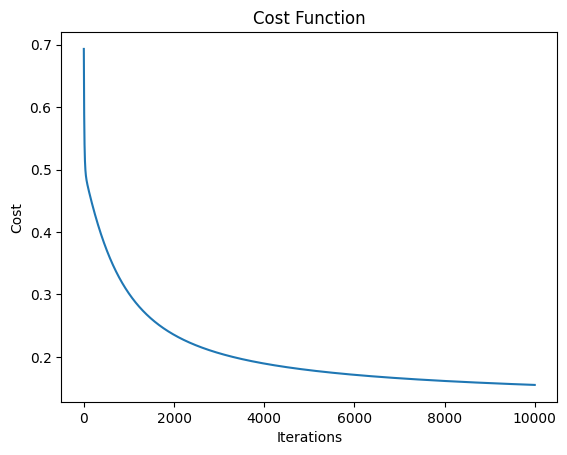

In [22]:
# Plotting the cost function
plt.plot(range(len(cost)), cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.show()

Now to predict we implement the following function that takes multiple examples in one numpy array x, and the parameters a, and gives back the prediction made for each example.
<br>**Reminder:** If the output of the sigmoid function is >0.5, we consider the output is 1, otherwise, we consider it 0

In [28]:
a = np.append(W, B)
print(a)

[-2.9999061  -0.26366236 -3.72352227 -0.49548212 13.28262723 -0.77892779]


In [29]:
def predict_smoker(x, a):
  
    # Add bias column to the input examples
    x_with_bias = np.c_[x, np.ones((x.shape[0], 1))]
    # Calculate the linear combination of inputs and weights
    z = np.dot(x_with_bias, a)
    
    # Apply the sigmoid function
    probabilities = sigmoid(z)
    
    # Apply the threshold of 0.5 to classify as 0 or 1
    result = (probabilities > 0.5).astype(int)
  
    return result

Make predictions on your test data using the predict_smoker: Compute the predictions associated with your test set

In [30]:
y_pred = predict_smoker(X_test.values,a)

In [31]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0])

##Classifier Evaluation

###Accuracy Score

In [32]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9063670411985019


###Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[199,   3],
       [ 22,  43]])